##                      Homework 2: Improving Image Classification Performance on the MNIST Dataset

#### Objective

#### In this assignment, you will:

1. Build and evaluate an MLP and a CNN on the MNIST dataset.
2. Experiment with 
3. Explore how training data proportions (10% vs. 30%), network design, and other hyper parameter configurations (e.g. learning rate) affect model performance.
4. Bonus: Achieve high test accuracy (≥98%) with your CNN model using 30% of training data.

## 🪄 Step 0: Setup

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

## Step 1: Load MNIST Dataset

In [17]:
# Transform: convert images to tensors and normalize to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(f"Training samples: {len(train_dataset)}, Testing samples: {len(test_dataset)}")


Training samples: 60000, Testing samples: 10000


# Step 2: Load Only 10% of the Training Data

In [18]:
torch.manual_seed(42)  # fixed seed for reproducibility
train_size = int(0.1 * len(train_dataset))
_, small_train_dataset = random_split(train_dataset, [len(train_dataset) - train_size, train_size])

batch_size = 32

train_loader = DataLoader(small_train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Subset training samples: {len(small_train_dataset)}")


Subset training samples: 6000


## Visualize a Few MNIST Samples
Before training, let’s look at a few examples from the dataset.

Sample shape: torch.Size([1, 28, 28])


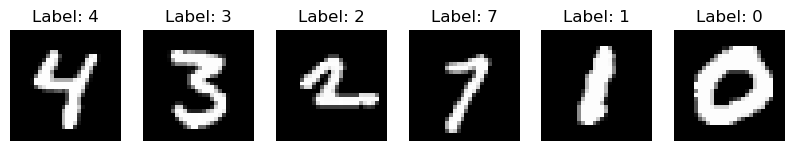

In [19]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig, axes = plt.subplots(1, 6, figsize=(10, 2))
for i in range(6):
    axes[i].imshow(example_data[i][0], cmap='gray')
    axes[i].set_title(f"Label: {example_targets[i]}")
    axes[i].axis('off')

print("Sample shape:", example_data[0].shape)
plt.show()


## Step 3: Define the Baseline MLP Model¶
We will use this predefined **Multi-Layer Perceptron (MLP)** structure for the first experiment. 


In [20]:
class MLP1(nn.Module):
    def __init__(self):
        super(MLP1, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


### Questions:
Before training your model, answer the following questions in your final report:

1. **Can we change the input dimension (784) in `fc1`? Why or why not?**  


2. **Can we change the output dimension (10) in `fc3`? Why or why not?**  
 

3. **Can we change the dimensions of the hidden layers (`256` or `128`)? Why or why not?**  
   


## Step 3: Train and Evaluate the MLP Model
Use the following hyper-parameters:
- **Learning rate:** 0.1  
- **Batch size:** 32  
- **Epochs:** 10

Use Cross-Entropy loss as your loss function  


In [21]:
def train(model, loader, criterion, optimizer):
    model.train()
    correct, total = 0, 0
    for images, labels in loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return correct / total

def test(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total


####  Training and Evaluation

In [22]:
model = MLP1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

train_acc, test_acc = [], []

for epoch in range(10):
    tr_acc = train(model, train_loader, criterion, optimizer)
    te_acc = test(model, test_loader)
    train_acc.append(tr_acc)
    test_acc.append(te_acc)
    print(f"Epoch {epoch+1}: Train Acc={tr_acc:.4f}, Test Acc={te_acc:.4f}")


Epoch 1: Train Acc=0.6297, Test Acc=0.6740
Epoch 2: Train Acc=0.8458, Test Acc=0.8713
Epoch 3: Train Acc=0.8990, Test Acc=0.8505
Epoch 4: Train Acc=0.9145, Test Acc=0.9192
Epoch 5: Train Acc=0.9298, Test Acc=0.9190
Epoch 6: Train Acc=0.9498, Test Acc=0.9290
Epoch 7: Train Acc=0.9525, Test Acc=0.8971
Epoch 8: Train Acc=0.9630, Test Acc=0.9068
Epoch 9: Train Acc=0.9707, Test Acc=0.9422
Epoch 10: Train Acc=0.9718, Test Acc=0.8809


### Show your performance


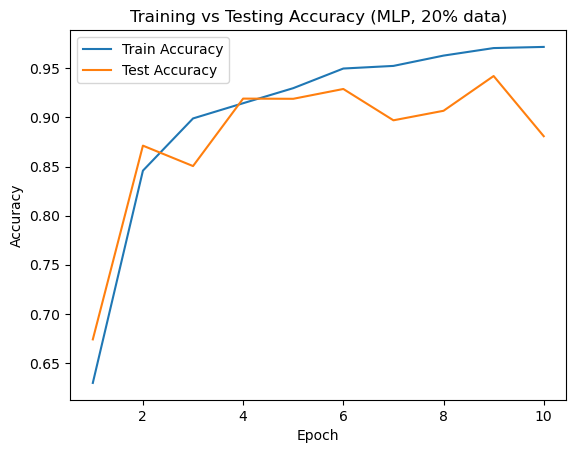

In [23]:
plt.plot(range(1, 11), train_acc, label='Train Accuracy')
plt.plot(range(1, 11), test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy (MLP, 20% data)')
plt.legend()
plt.show()


## Step 4: Using 30% of the Training Data
Now repeat the same process, but using **30%** of the training data.

Compare the new test accuracy to your previous results.

set seed to be 42 using torch.manual_seed(42)

## Step 5: Design Your Own CNN Model
Now, design your own **Convolutional Neural Network (CNN)**.

Your **goal** is to beat the best MLP test accuracy using only 30% of the training data (same as Step 4)

## Step 6: Hyper-parameter and Learning Rate Exploration
Using the **same CNN** as Step 5, experiment with:
- Different learning rates  
- Optional learning rate schedulers (`StepLR`, `ReduceLROnPlateau`, etc.)
- Batch Size

Goal: **Improve the test accuracy** from your previous CNN experiment on Step 5.

## Step 7: Analysis
Write a short report discussing the following points:
1. **Effect of Data Size:**  
   How did the amount of training data (10% vs 30%) affect your model’s generalization performance?  
   
2. **Effect of Model Architecture:**  
   How did different network architectures (MLP vs CNN) impact generalization?

3. **Effect of Learning Rate:**  
   How did the choice of learning rate (and/or use of a learning rate scheduler) influence **convergence** speed and final performance?

4. **Effective Design Choices:**  
   Which design decisions (e.g., number of layers, hidden dimension, activation functions, batch size) in your experiments contributed most to improving the model's generalization performance?

5. **Limitations and Improvement Strategies:**  
   What limitations or challenges did you observe in your experiments (e.g., overfitting, slow convergence, unstable training)?  
   Suggest one or two strategies that could further improve model performance.